In [1]:
!nvidia-smi

Fri Apr 12 09:31:14 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import zipfile

# Specify the path to your zip file
zip_path = "/content/drive/MyDrive/alliance_university_2/leukemia/leukemia_dataset.zip"

# Specify the directory where you want to extract the contents of the zip file
extract_path = "/content/drive/MyDrive/alliance_university_2/leukemia/"

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Zip file extracted successfully.")

Zip file extracted successfully.


In [ ]:
import os
os.chdir("/content/drive/MyDrive/alliance_university_2/leukemia/")

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/alliance_university_2/leukemia


In [ ]:
!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.1/201.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!yolo task=segment mode=train model=yolov8s-seg.pt data=/content/drive/MyDrive/alliance_university_2/leukemia/leukemia_dataset/data.yaml epochs=10 imgsz=640 save=true




100% 22.8M/22.8M [00:00<00:00, 156MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/drive/MyDrive/alliance_university_2/leukemia/leukemia_dataset/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True,

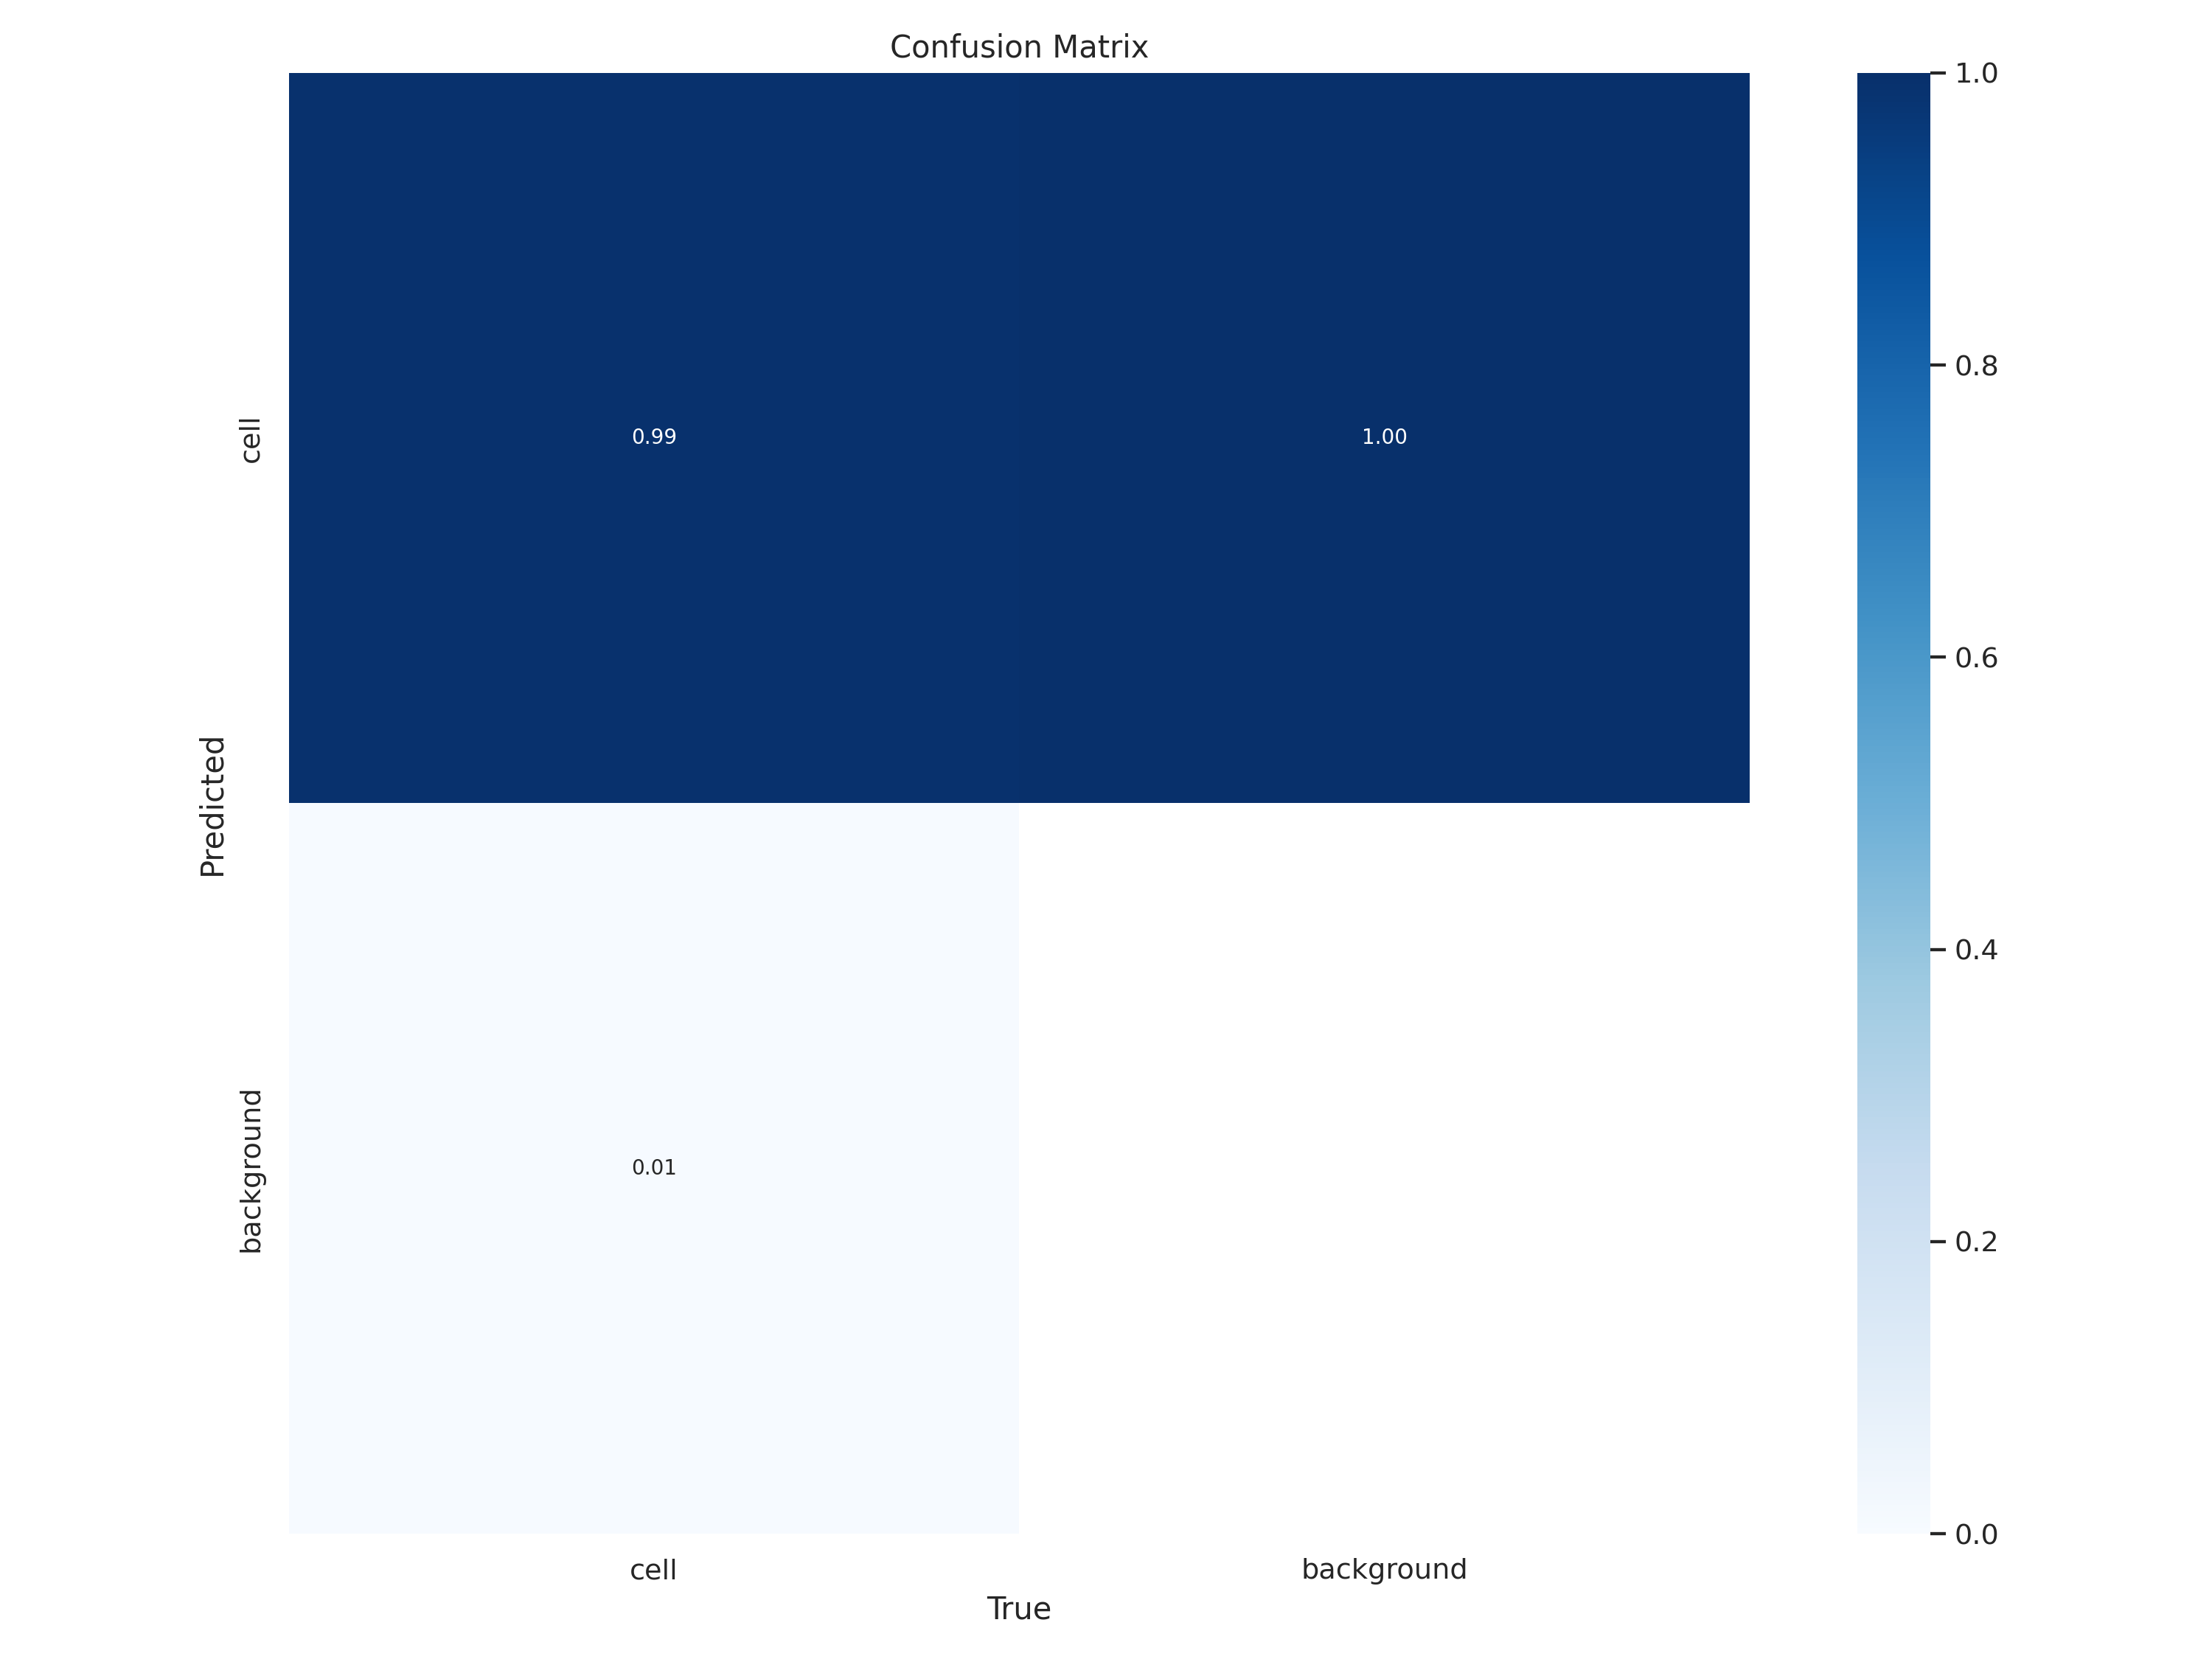

In [ ]:
Image(filename=f'/content/drive/MyDrive/alliance_university_2/leukemia/runs/segment/train/confusion_matrix.png', width=600)

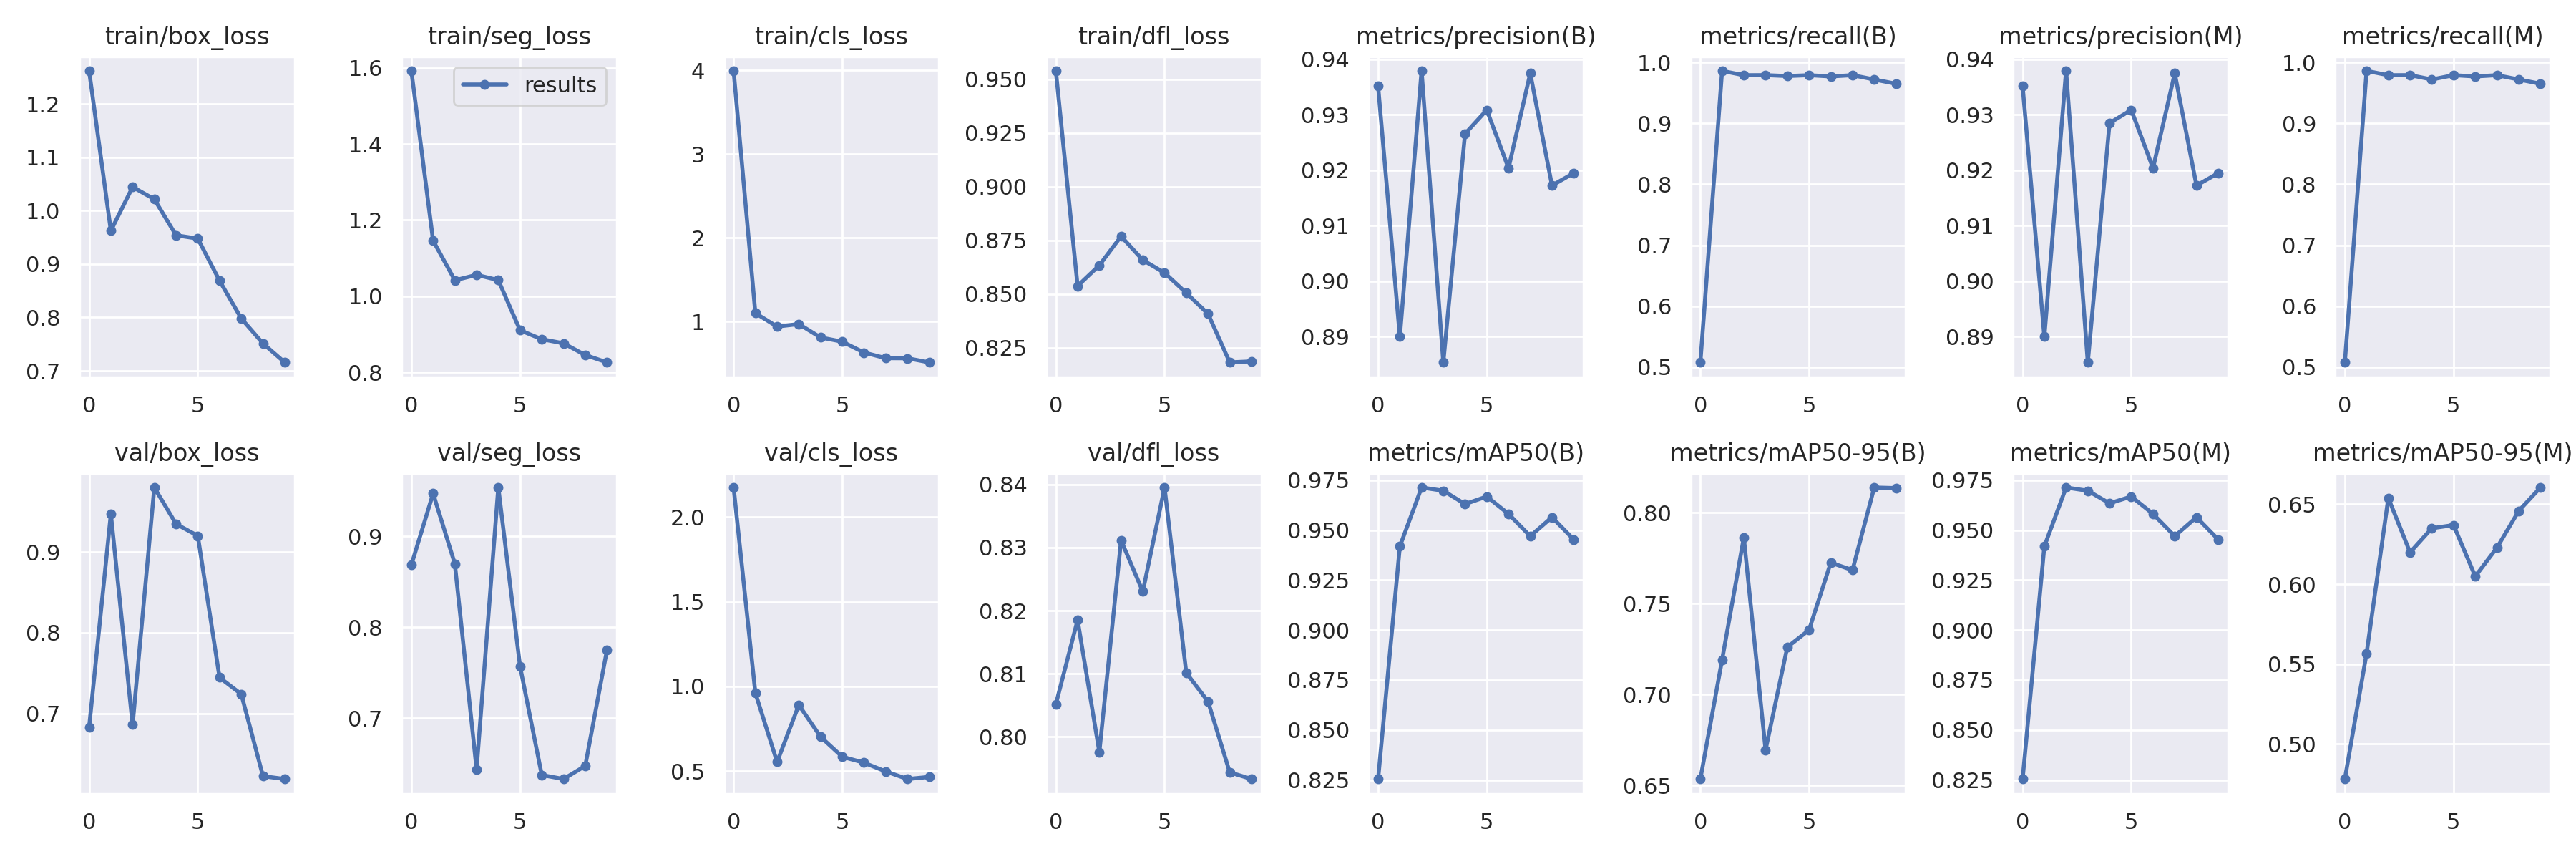

In [ ]:

Image(filename=f'/content/drive/MyDrive/alliance_university_2/leukemia/runs/segment/train/results.png', width=600)

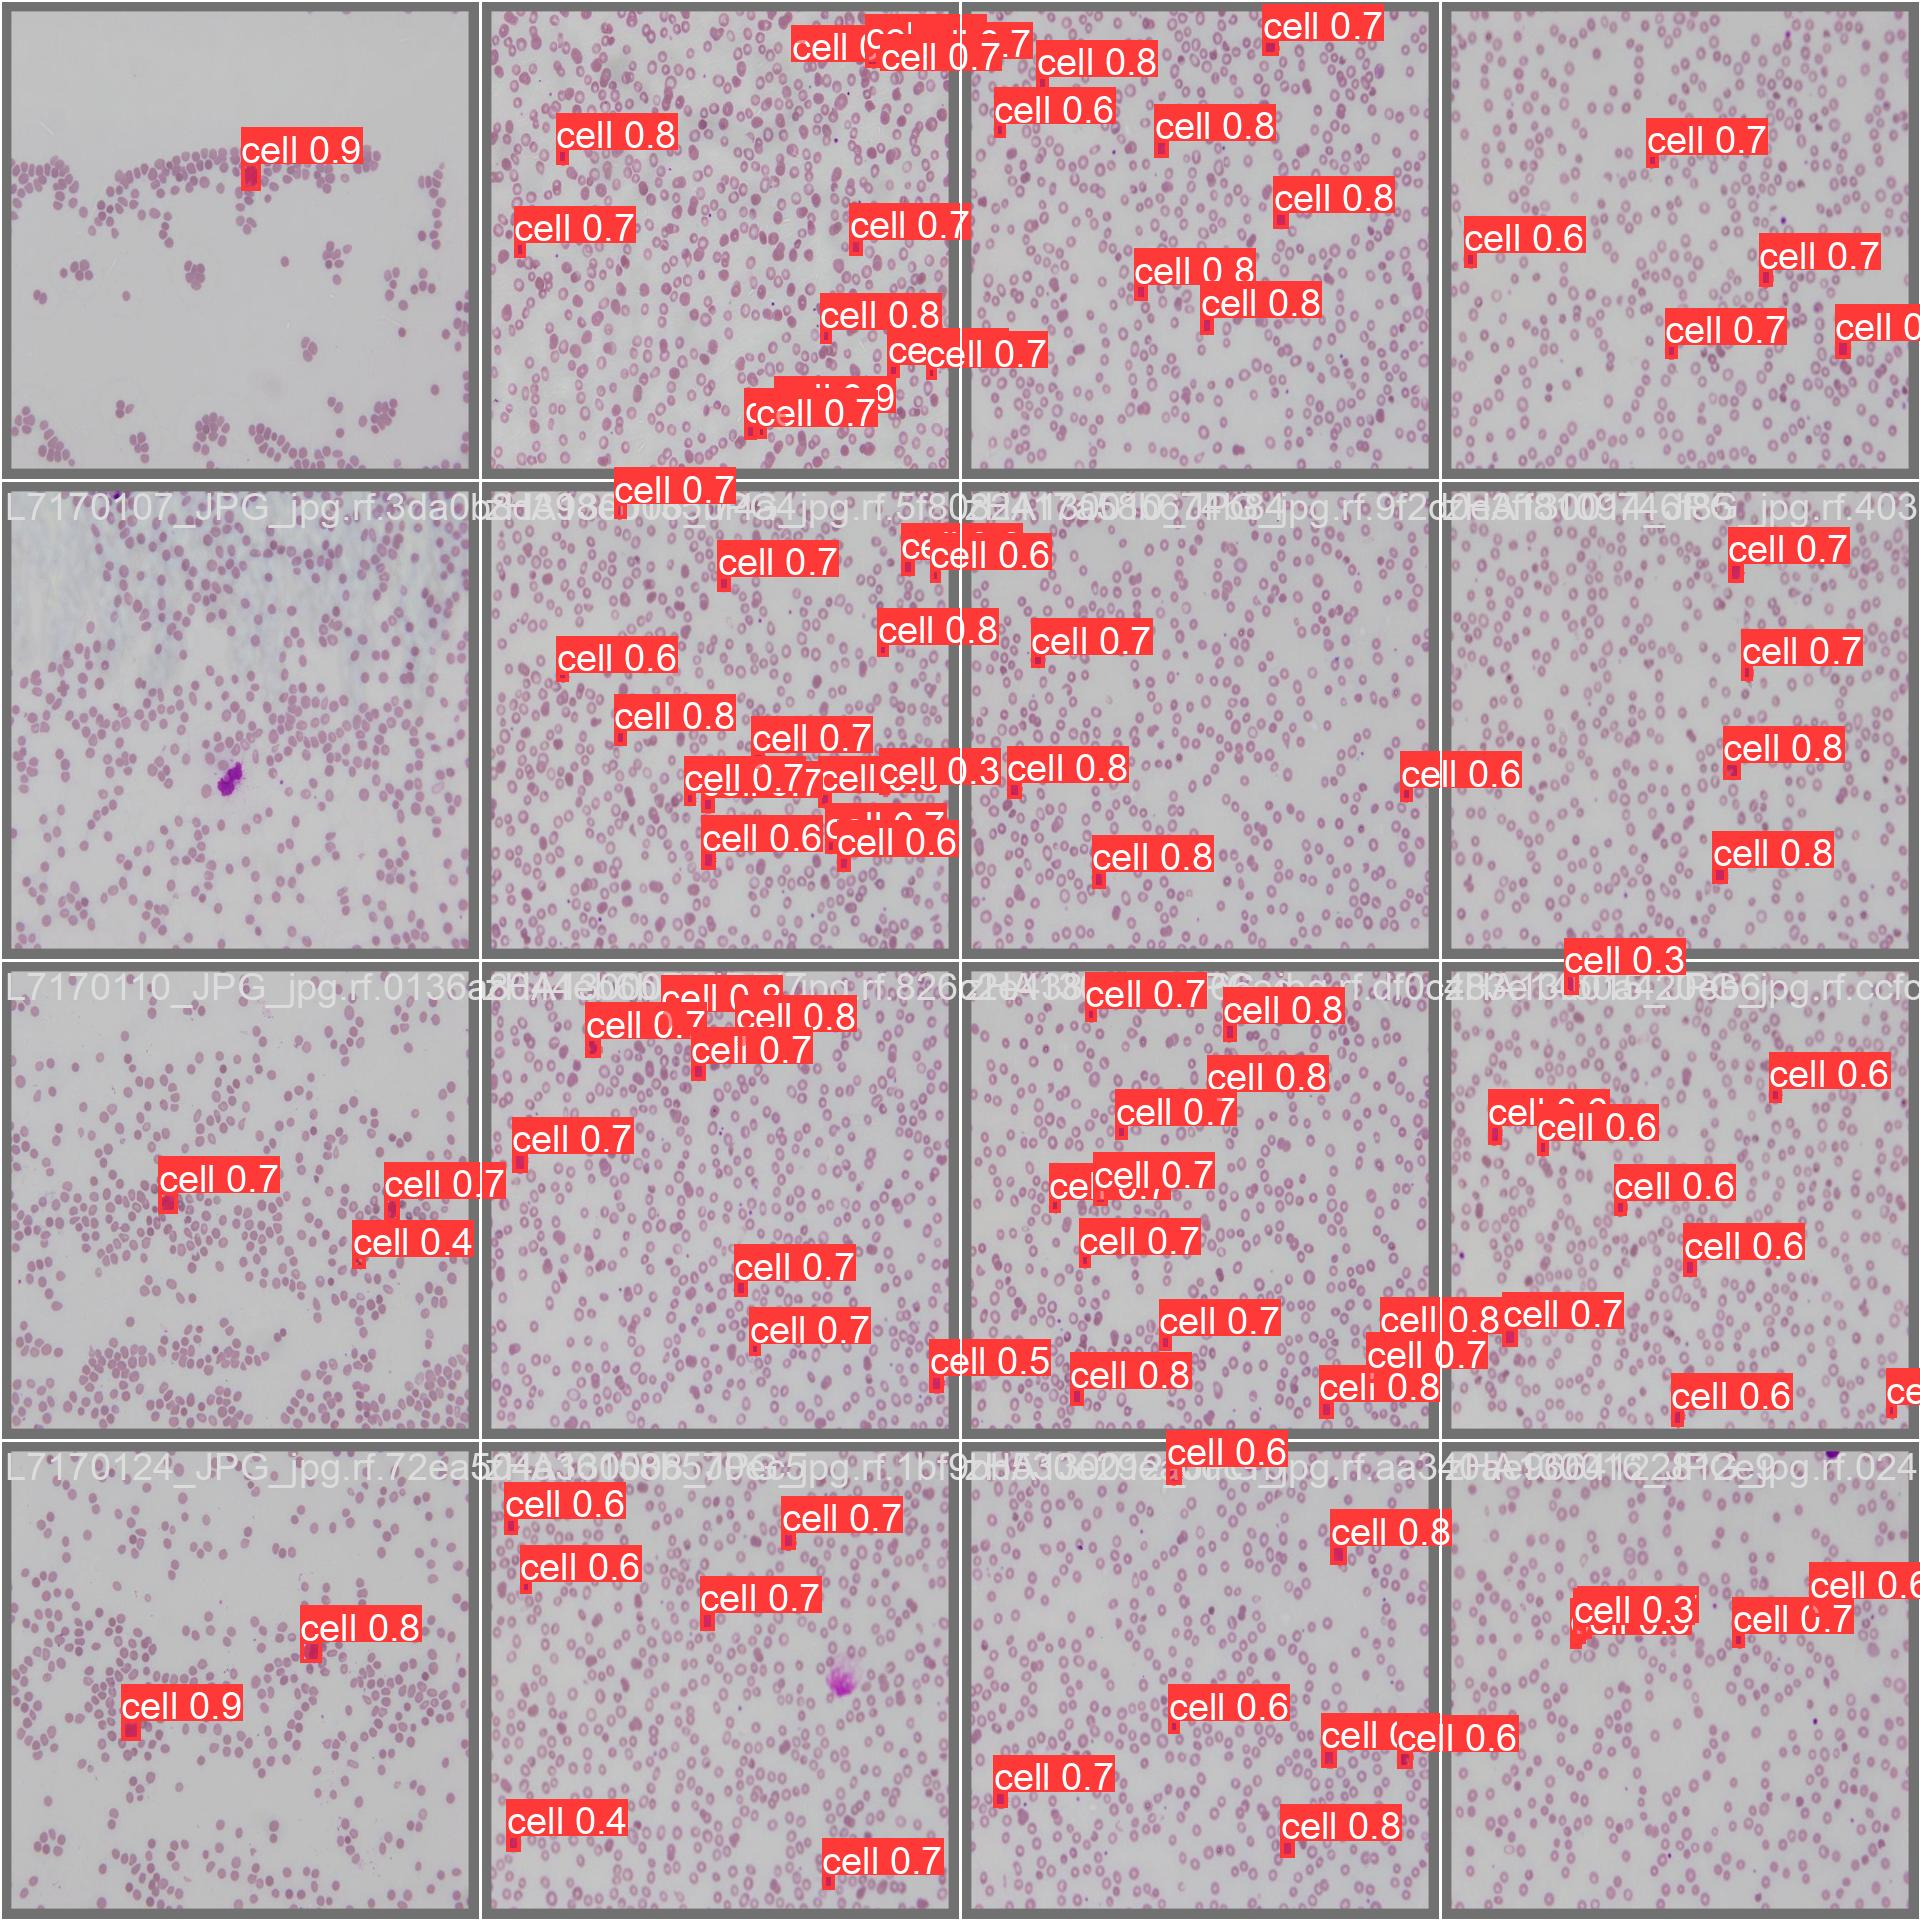

In [ ]:

Image(filename=f'/content/drive/MyDrive/alliance_university_2/leukemia/runs/segment/train/val_batch0_pred.jpg', width=600)

In [ ]:


!yolo task=segment mode=val model=runs/segment/train/weights/best.pt data=leukemia_dataset/data.yaml

2024-04-11 13:44:14.641895: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-11 13:44:14.641944: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-11 13:44:14.643395: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-11 13:44:16.538440: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/drive/MyDrive/alliance_universit

In [ ]:


!yolo task=segment mode=predict model=runs/segment/train/weights/best.pt conf=0.25 source=leukemia_dataset/test/images save=true

2024-04-11 13:44:51.477760: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-11 13:44:51.477816: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-11 13:44:51.479109: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-11 13:44:52.618557: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs

image 1/11 /content/drive/MyDrive/alliance_university_

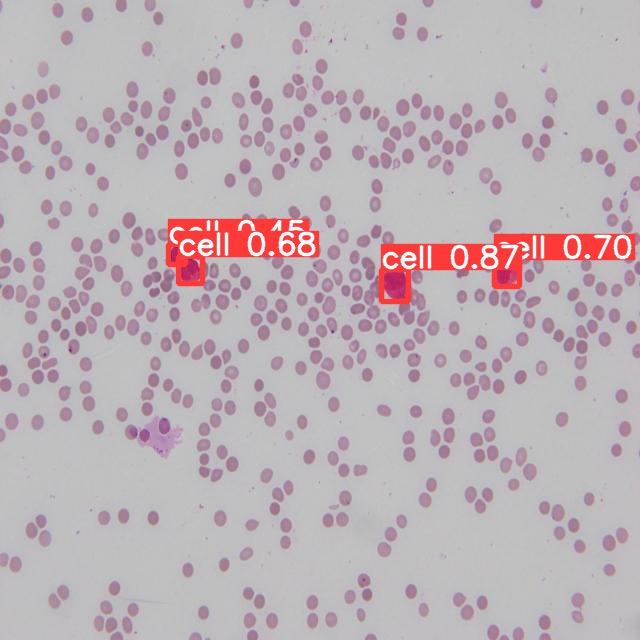

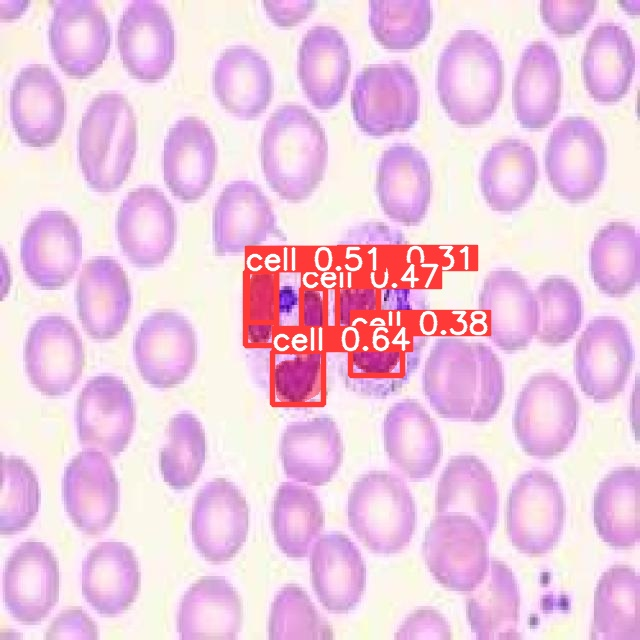

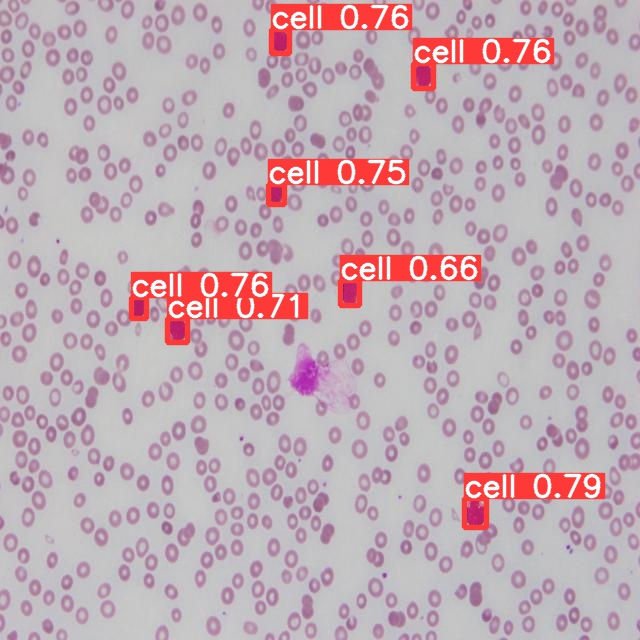

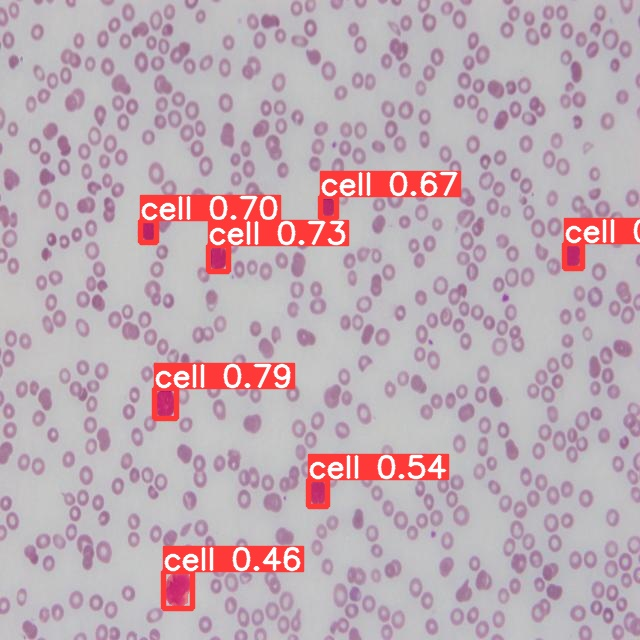

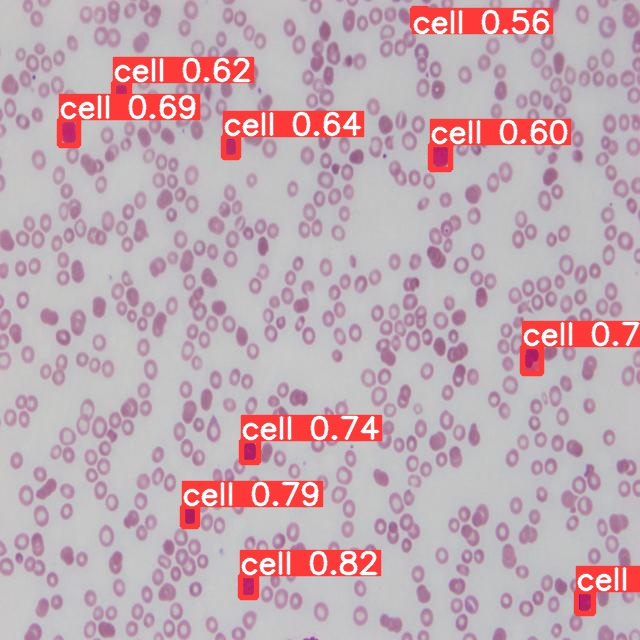

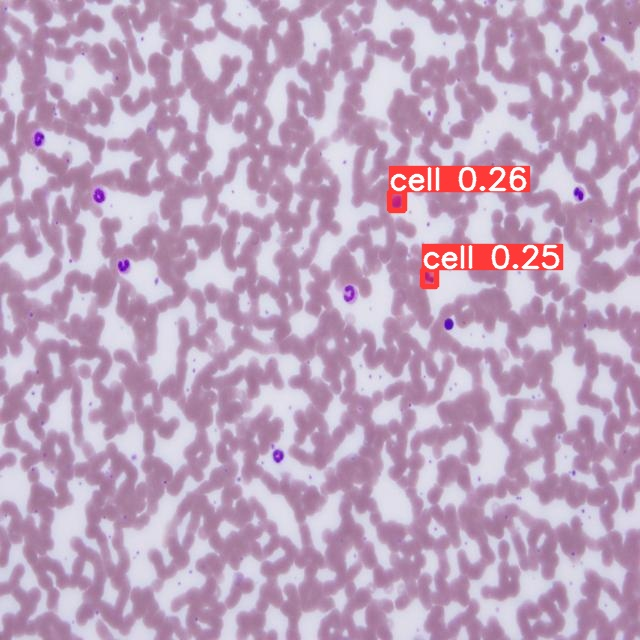

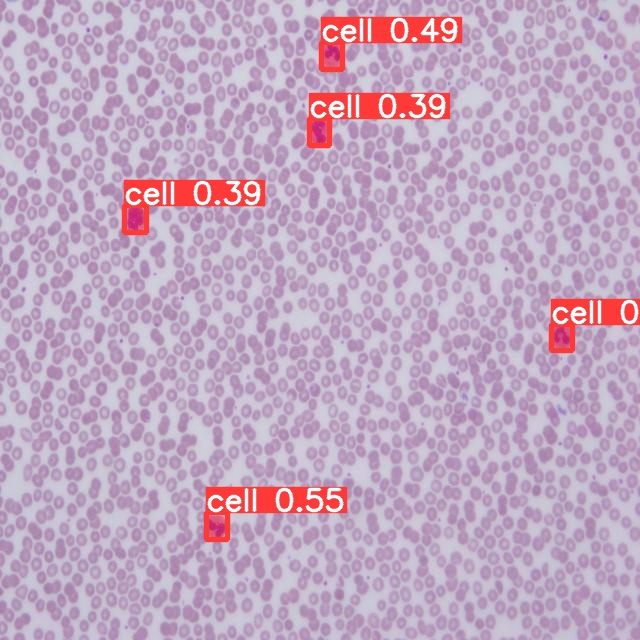

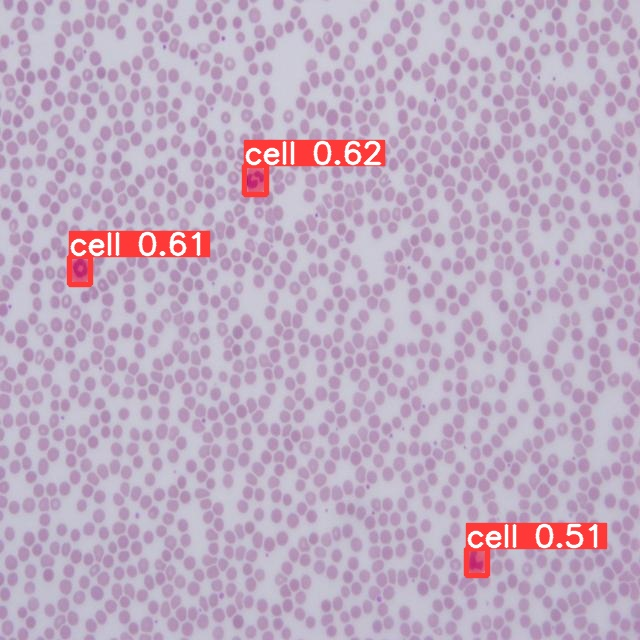

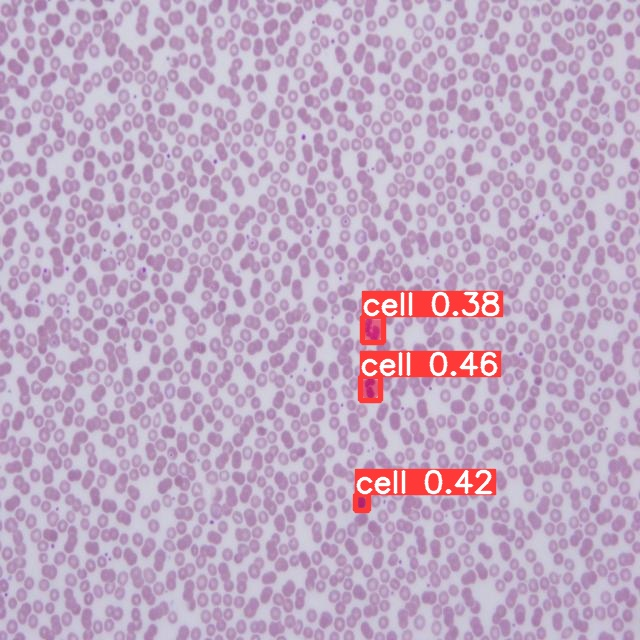

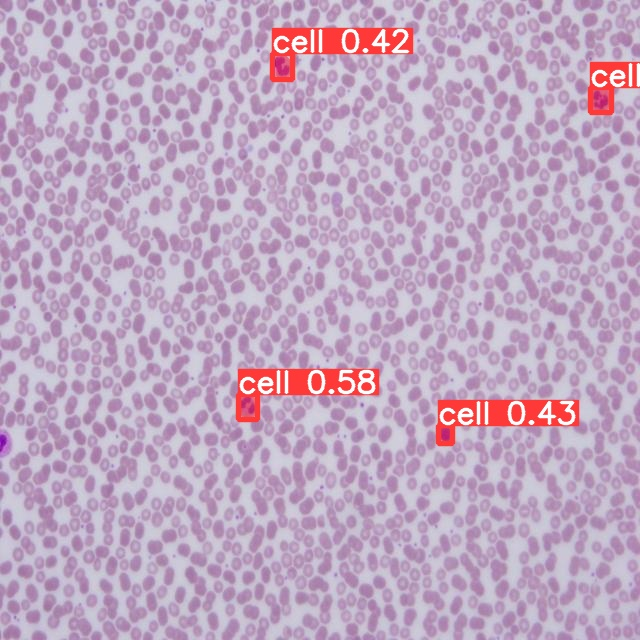

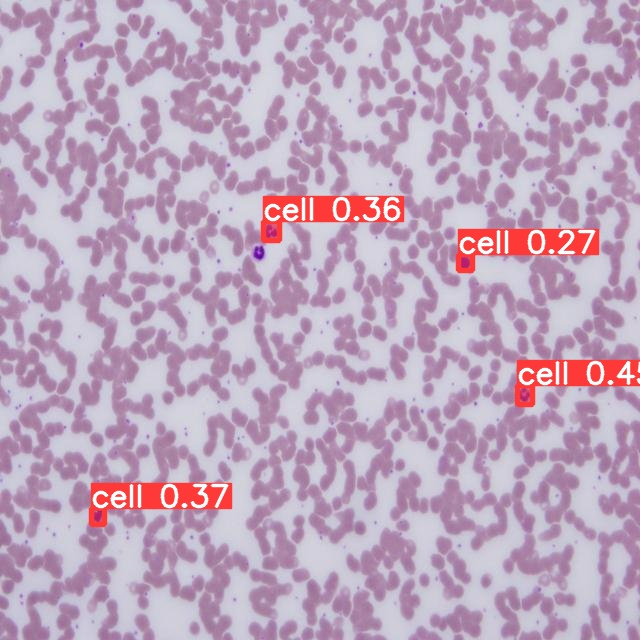

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/segment/predict/*.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")

# CERVICAL LESION

In [ ]:
import zipfile

# Specify the path to your zip file
zip_path = "/content/drive/MyDrive/alliance_university_2/cervical_lesion/cervical_lesion.zip"

# Specify the directory where you want to extract the contents of the zip file
extract_path = "/content/drive/MyDrive/alliance_university_2/cervical_lesion/"

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Zip file extracted successfully.")

Zip file extracted successfully.


In [ ]:
import os
os.chdir("/content/drive/MyDrive/alliance_university_2/cervical_lesion/")

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/alliance_university_2/cervical_lesion


In [ ]:
!yolo task=segment mode=train model=yolov8s-seg.pt data=cervical_lesion/data.yaml epochs=10 imgsz=640 save=true

100% 22.8M/22.8M [00:00<00:00, 147MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=cervical_lesion/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=

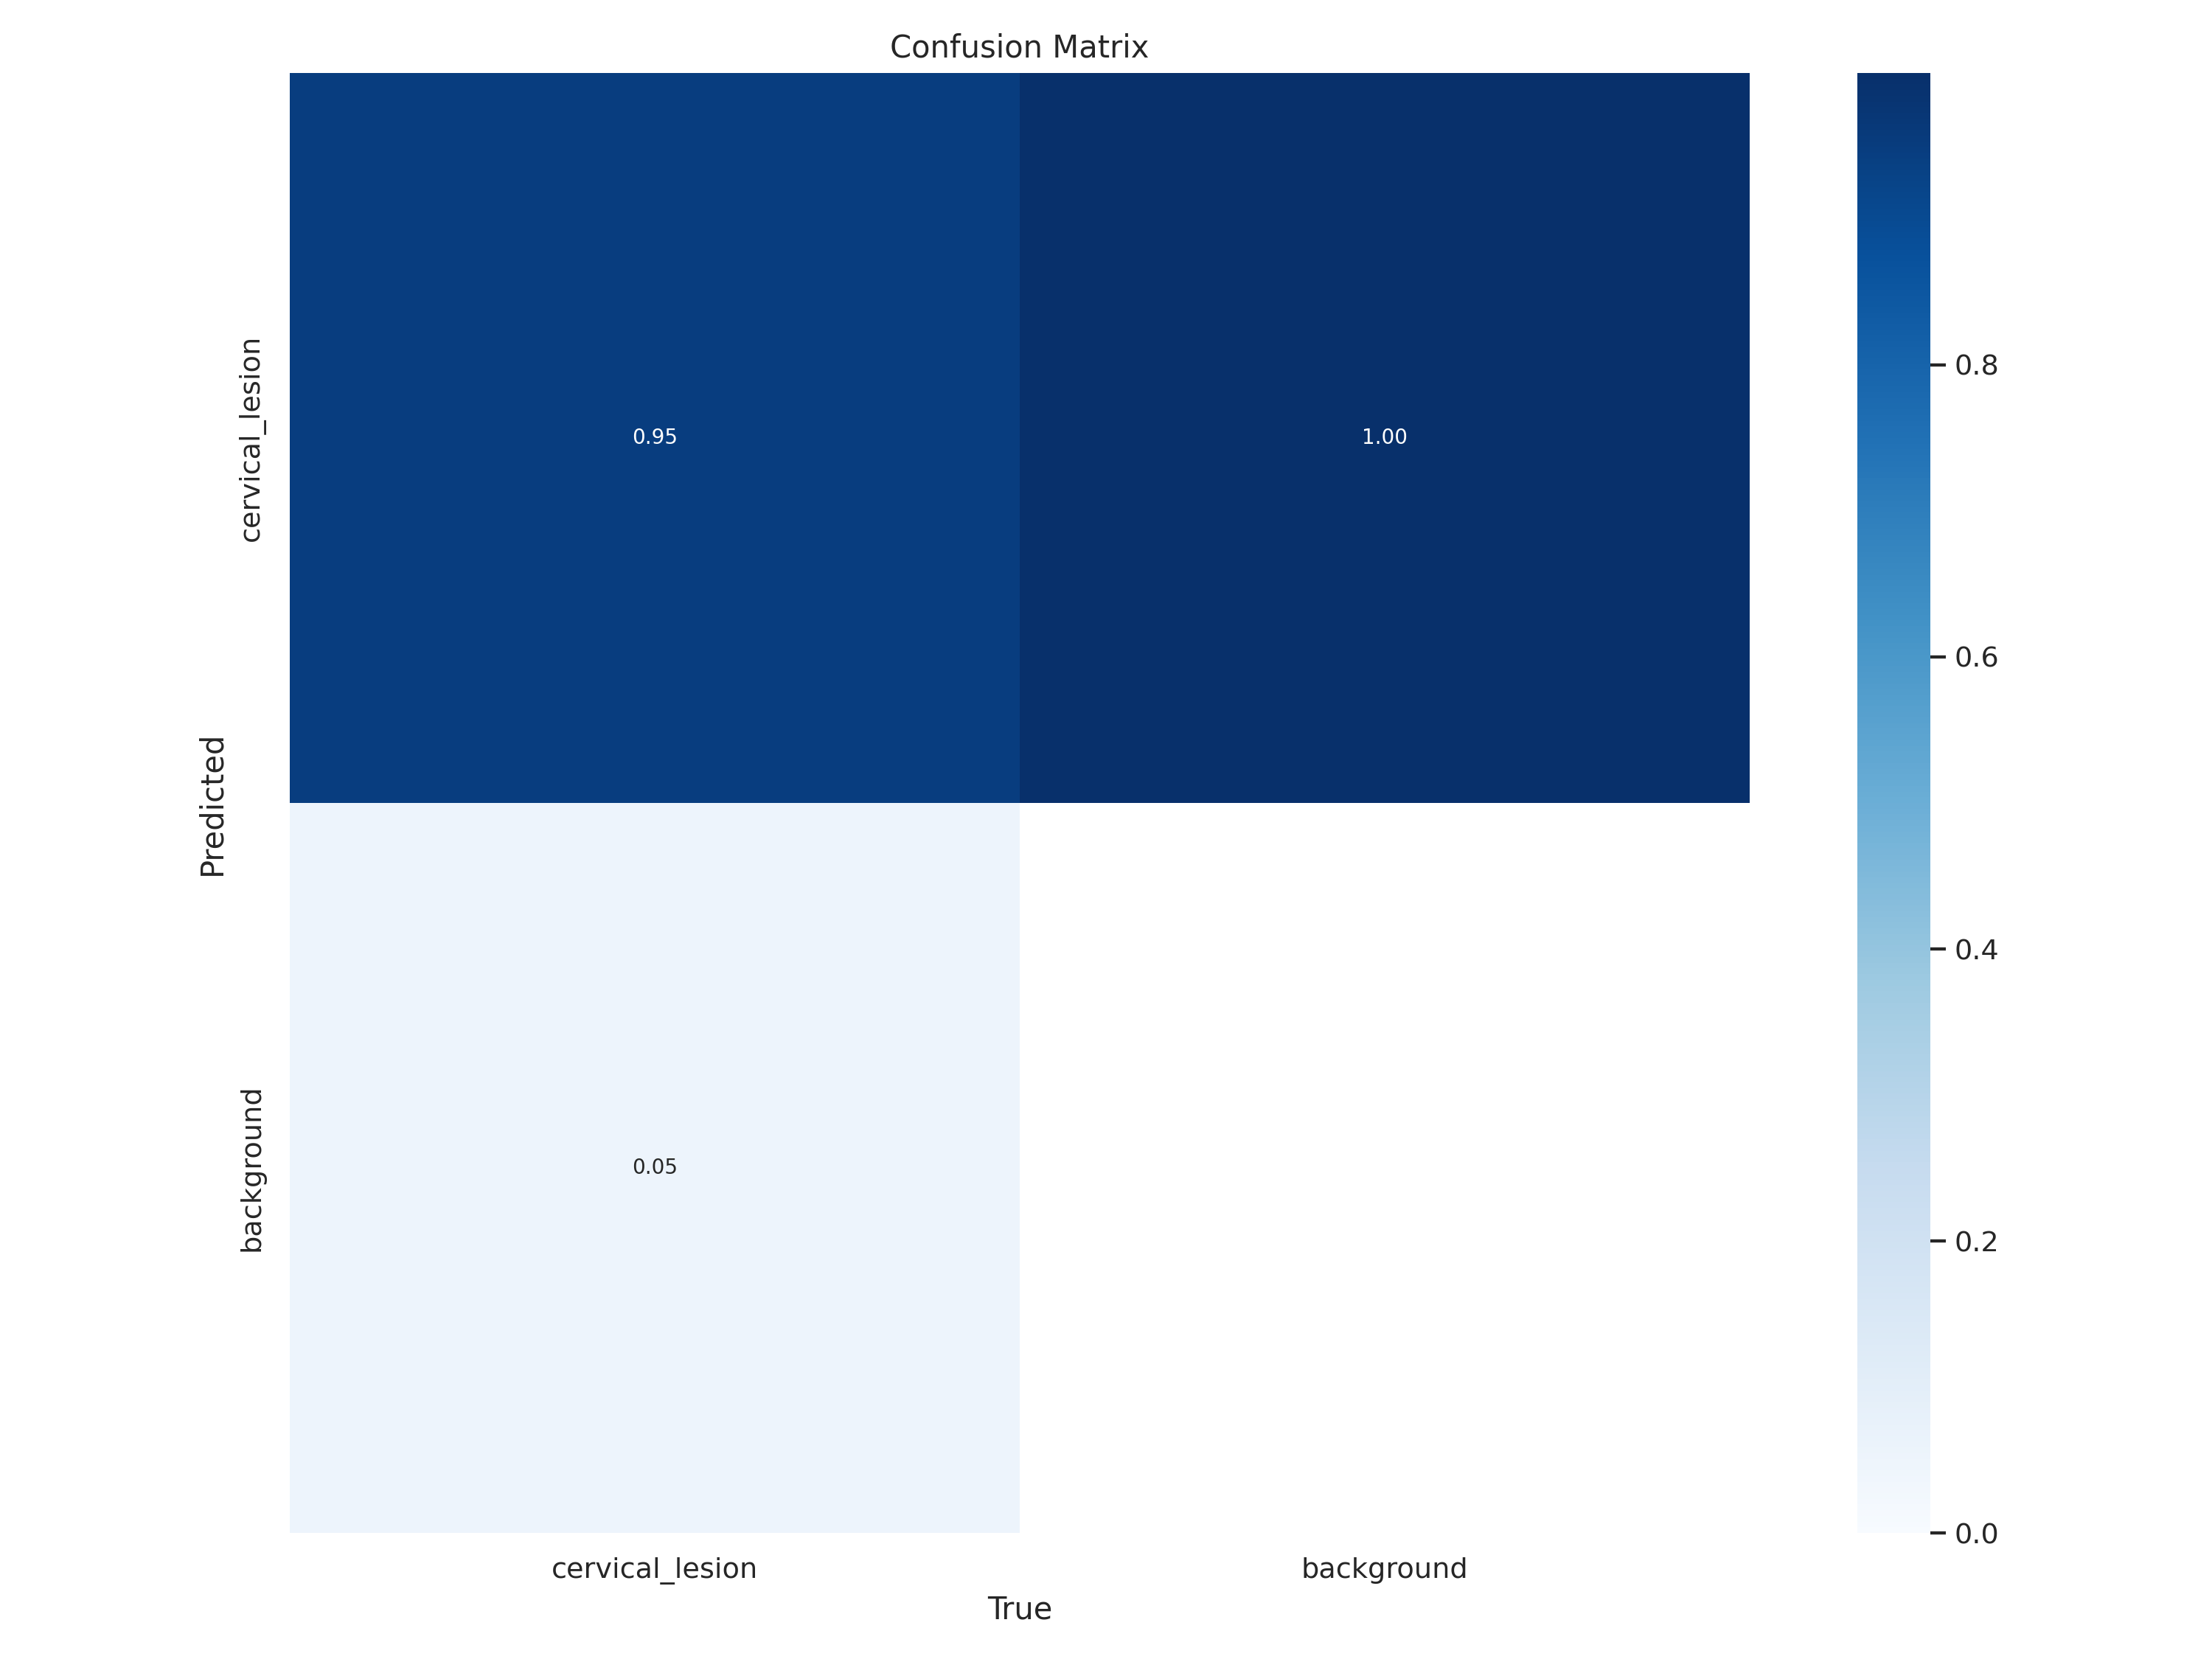

In [ ]:
Image(filename=f'runs/segment/train/confusion_matrix.png', width=600)

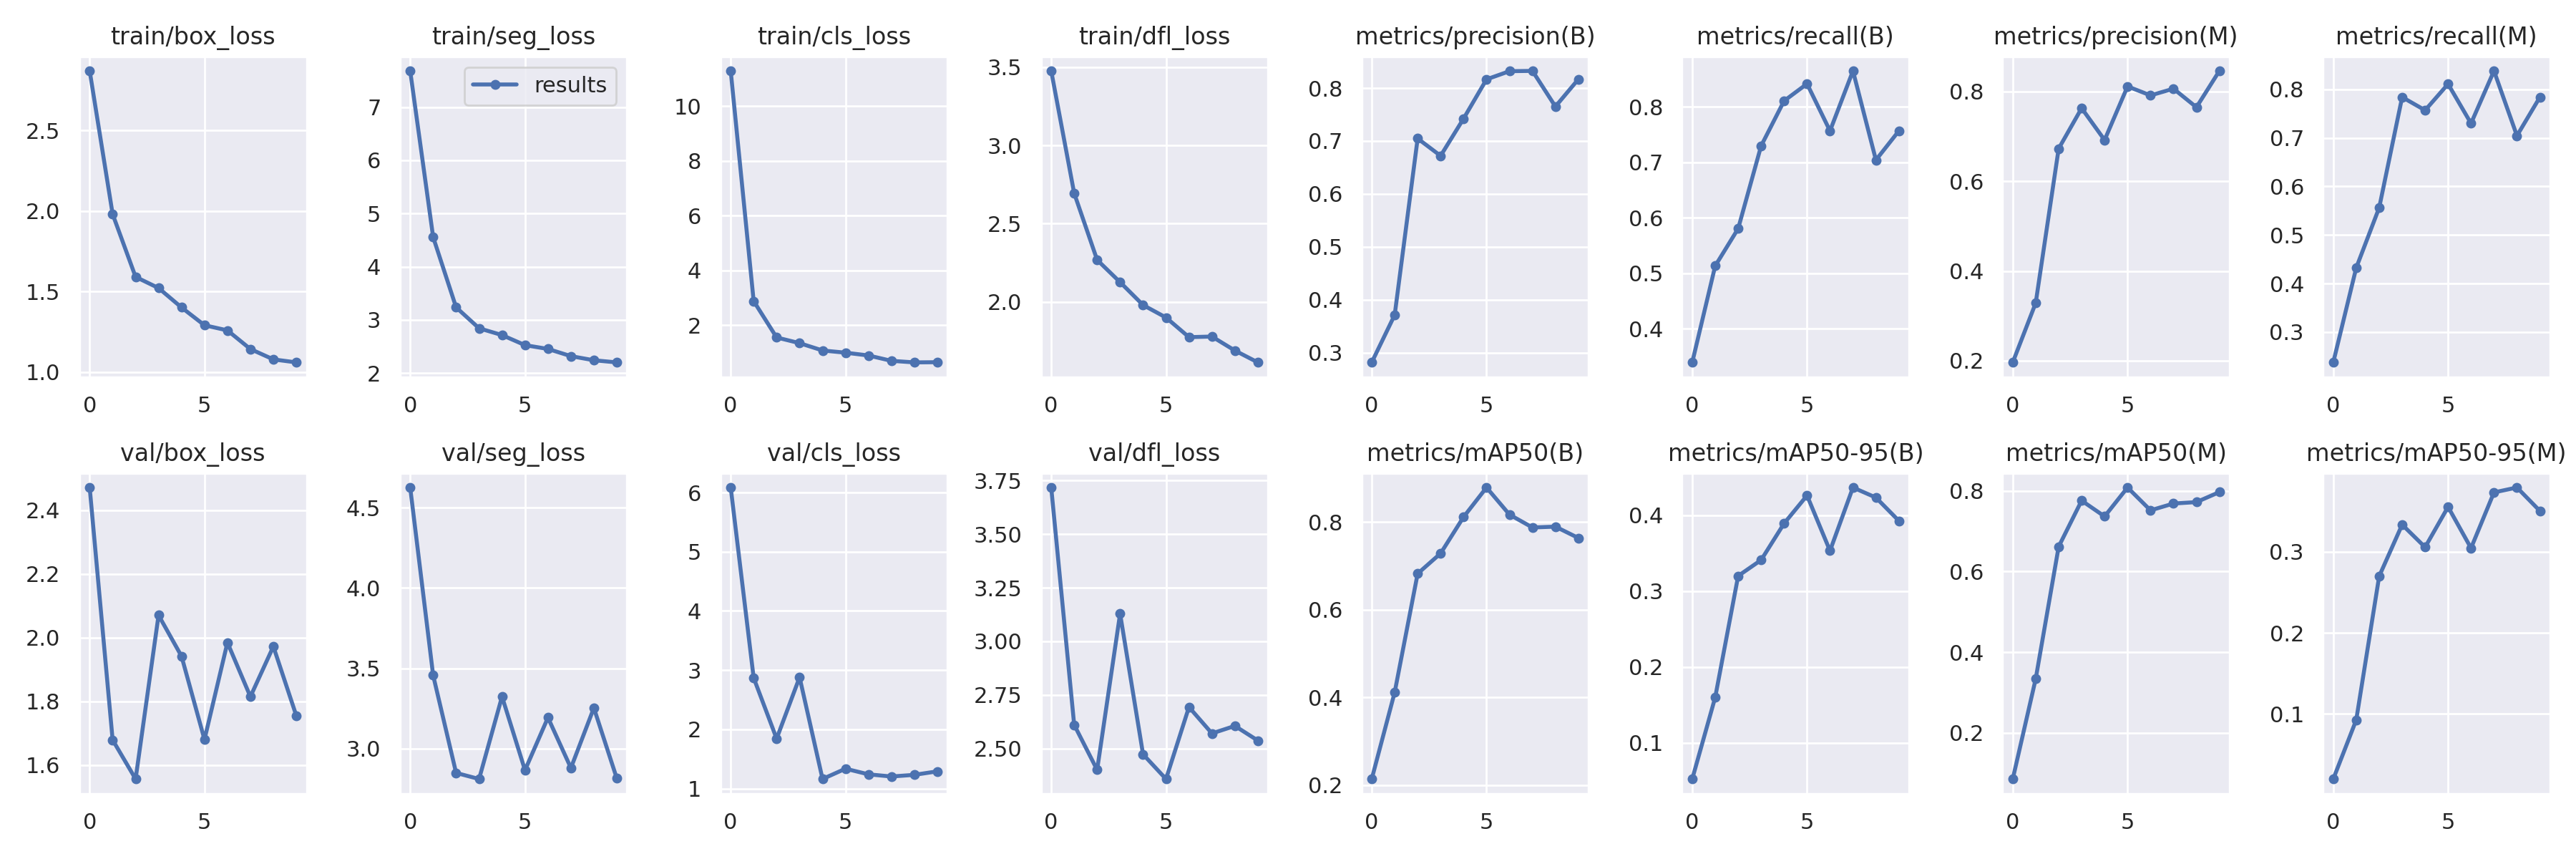

In [ ]:
Image(filename=f'runs/segment/train/results.png', width=600)

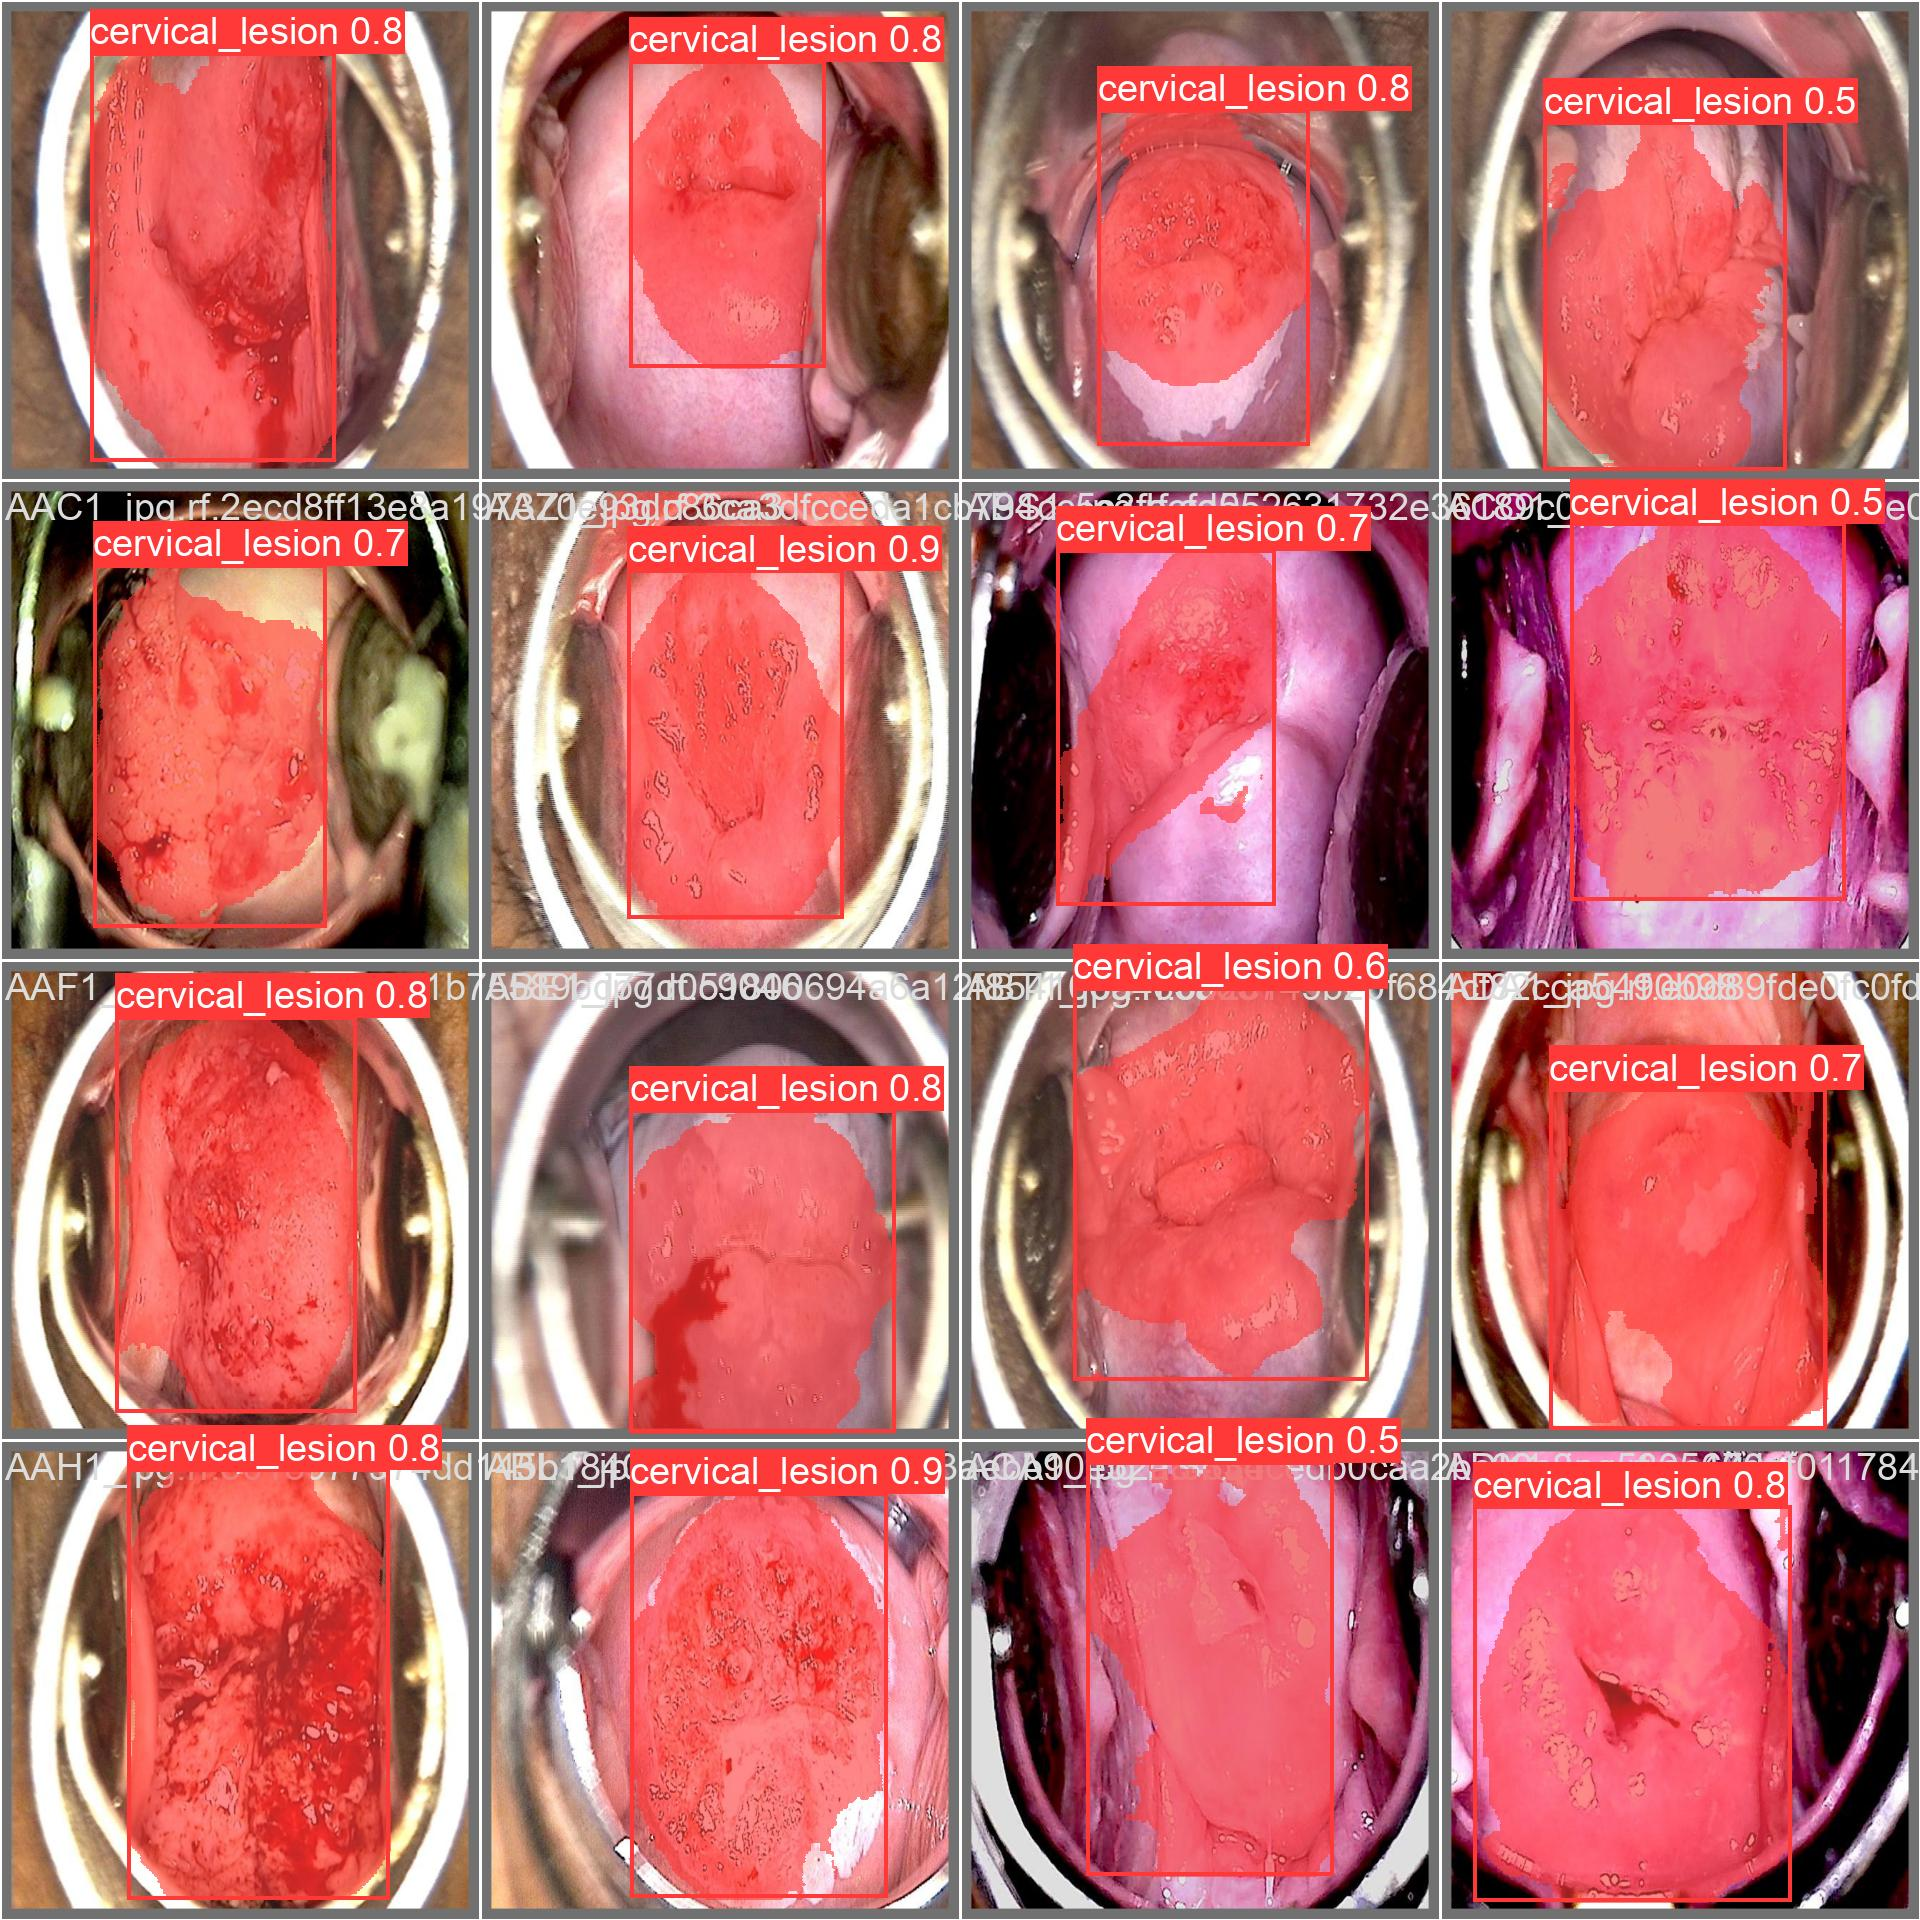

In [ ]:
Image(filename=f'runs/segment/train/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=segment mode=val model=runs/segment/train/weights/best.pt data=cervical_lesion/data.yaml

2024-04-11 15:07:32.486195: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-11 15:07:32.486245: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-11 15:07:32.487678: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-11 15:07:34.120896: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/drive/MyDrive/alliance_universit

In [ ]:
!yolo task=segment mode=predict model=runs/segment/train/weights/best.pt conf=0.25 source=cervical_lesion/test/images save=true

2024-04-11 15:07:54.564124: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-11 15:07:54.564177: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-11 15:07:54.565684: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-11 15:07:55.682640: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs

image 1/18 /content/drive/MyDrive/alliance_university_

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/segment/predict/*.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")

Output hidden; open in https://colab.research.google.com to view.